In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score,plot_confusion_matrix

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ashish_Parulekar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ashish_Parulekar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ashish_Parulekar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
DataF=pd.read_csv('spam_Mail_dataset.csv',encoding='ISO-8859-1')

In [3]:
DataF.head(5)

,Unnamed: 0,label,text,label_num
0,605.0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0.0
1,2349.0,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0.0
2,3624.0,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0.0
3,4685.0,spam,"Subject: photoshop , windows , office . cheap ...",1.0
4,2030.0,ham,Subject: re : indian springs\r\nthis deal is t...,0.0


In [4]:
DataF.tail(5)

,Unnamed: 0,label,text,label_num
10741,NaN,ham,Will Ì_ b going to esplanade fr home?,NaN
10742,NaN,ham,"Pity, * was in mood for that. So...any other s...",NaN
10743,NaN,ham,The guy did some bitching but I acted like i'd...,NaN
10744,NaN,ham,Rofl. Its true to its name,NaN
10745,NaN,spam,Click to get upto 1 CR. worth scholarship,NaN


In [5]:
Data=DataF[['label','text']].rename(columns={'label':'Target'})

In [6]:
Data.head(2)


,Target,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."


# Data Preprocessing

In [7]:
#Checking Null Value 
Data.isnull().sum()

Target    1
text      1
dtype: int64

In [8]:
#Count of null value is less so we can Drope 
Data.dropna(inplace=True)
Data.shape

(10745, 2)

In [9]:
# Checking Duplicate
Data.duplicated().sum()

581

In [10]:
#Removig duplicate value
Data.drop_duplicates(inplace=True)
Data.shape

(10164, 2)

In [11]:
Data['Target'].replace({'ham':0,'spam':1},inplace=True)

In [12]:

def process(text):
  token=word_tokenize(text)
  stop_world=list(stopwords.words('english'))
  punctuation=set(string.punctuation)
  result=[]
  for i in token:
    if (i.strip() in stop_world) or (i.strip()  in punctuation) :
      continue
    elif i=='Subject':
      continue
    else :   
      la=WordNetLemmatizer()
      i=la.lemmatize(i)
      result.append(i)
  strings=" ".join(result)
  #strings=strings.lower()
  #text=TextBlob(strings)
  return strings
            

In [13]:
process_text=Data['text'].apply(process)
Data['process_text']=process_text

In [14]:
Data.head(10)

,Target,text,process_text
0,0,Subject: enron methanol ; meter # : 988291\r\n...,enron methanol meter 988291 follow note gave m...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",hpl nom january 9 2001 see attached file hplno...
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",neon retreat ho ho ho around wonderful time ye...
3,1,"Subject: photoshop , windows , office . cheap ...",photoshop window office cheap main trending ab...
4,0,Subject: re : indian springs\r\nthis deal is t...,indian spring deal book teco pvr revenue under...
5,0,Subject: ehronline web address change\r\nthis ...,ehronline web address change message intended ...
6,0,Subject: spring savings certificate - take 30 ...,spring saving certificate take 30 save 30 use ...
7,1,Subject: looking for medication ? we ` re the ...,looking medication best source difficult make ...
8,0,Subject: noms / actual flow for 2 / 26\r\nwe a...,noms actual flow 2 26 agree forwarded melissa ...
9,0,"Subject: nominations for oct . 21 - 23 , 2000\...",nomination oct 21 23 2000 see attached file hp...


In [15]:
#Vectorization#

In [16]:
CV=CountVectorizer(stop_words='english')
Cv_vector=CV.fit_transform(Data['process_text']).toarray()

In [17]:
Cv_vector=pd.DataFrame(Cv_vector)

In [18]:
#Data Spliting
y=Data['Target']
x=Cv_vector

# Data Balancing

In [19]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [20]:
#x_n,y_n=sm.fit_resample(x,y)

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70)

In [22]:
x_train,y_train=sm.fit_resample(x_train,y_train)
x_test,y_test=sm.fit_resample(x_test,y_test)

In [23]:
#Logistic Regression 

In [24]:
Logi=LogisticRegression()

In [25]:
Logi.fit(x_train,y_train)

C:\Users\Ashish_Parulekar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
Logi.score(x_train,y_train)

0.9736702597632091

In [27]:
Logi.score(x_test,y_test)

0.9200502302218502

In [28]:
y_pri=Logi.predict(x_test)

C:\Users\Ashish_Parulekar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


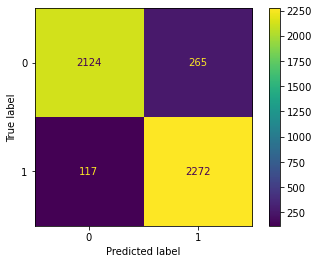

In [29]:
plot_confusion_matrix(Logi,X=x_test,y_true=y_test)

In [38]:
import pickle

In [43]:
import joblib

In [40]:
pickle.dump([Logi,CV],open('New.pkl','wb'))

In [44]:
filename = 'finalized_model.sav'
joblib.dump([Logi,CV], filename)

['finalized_model.sav']

In [33]:
x=process('Ashish parulekar is good boy')

In [34]:
p=CV.transform([x]).toarray()

In [35]:
Logi.predict(p)

array([0], dtype=int64)

# END